<a href="https://colab.research.google.com/github/timothyel/Project-Individual/blob/main/Individual%20Project/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Desc**

Loan_ID : Unique Loan ID

Gender : Male/ Female

Married : Applicant married (Y/N)

Dependents : Number of dependents

Education : Applicant Education (Graduate/ Under Graduate)

Self_Employed : Self employed (Y/N)

ApplicantIncome : Applicant income

CoapplicantIncome : Coapplicant income

LoanAmount : Loan amount in thousands of dollars

Loan_Amount_Term : Term of loan in months

Credit_History : Credit history meets guidelines yes or no

Property_Area : Urban/ Semi Urban/ Rural

Loan_Status : Loan approved (Y/N) this is the target variable

#**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.float_format', lambda x: '%.3f' % x) # 3 angka di belakang koma
pd.options.display.float_format = '{:,.2f}'.format # add thousand separator for float
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

#**Import Sheet**

In [ ]:
data = 'https://docs.google.com/spreadsheets/d/1fpWKfltwVtwbdFGV5AILV0ZlDI3isGsjjA9mAaIGpPY/edit#gid=1176210033'
data_trf = data.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(data_trf)

#**Checking Data**

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.00,NaN,360.00,1.00,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,"1,508.00",128.00,360.00,1.00,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.00,66.00,360.00,1.00,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,"2,358.00",120.00,360.00,1.00,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.00,141.00,360.00,1.00,Urban,Y


In [ ]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.00,71.00,360.00,1.00,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.00,40.00,180.00,1.00,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.00,253.00,360.00,1.00,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.00,187.00,360.00,1.00,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.00,133.00,360.00,0.00,Semiurban,N


In [ ]:
df.shape

(614, 13)

In [ ]:
print("Number of Rows", df.shape[0])
print("Number of Columns", df.shape[1])

Number of Rows 614
Number of Columns 13


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


##**Handling Missing Value**

In [ ]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.isna().sum()*100/len(df)

Loan_ID             0.00
Gender              2.12
Married             0.49
Dependents          2.44
Education           0.00
Self_Employed       5.21
ApplicantIncome     0.00
CoapplicantIncome   0.00
LoanAmount          3.58
Loan_Amount_Term    2.28
Credit_History      8.14
Property_Area       0.00
Loan_Status         0.00
dtype: float64

drop the missing value < 5% and fill the missing value > 5%

In [ ]:
df1 = df.copy()

In [ ]:
columns = ['Gender','LoanAmount','Loan_Amount_Term','Dependents']

In [ ]:
df1 = df1.dropna(subset=columns)

In [ ]:
df1.isnull().sum()*100 / len(df1)

Loan_ID             0.00
Gender              0.00
Married             0.00
Dependents          0.00
Education           0.00
Self_Employed       5.42
ApplicantIncome     0.00
CoapplicantIncome   0.00
LoanAmount          0.00
Loan_Amount_Term    0.00
Credit_History      8.68
Property_Area       0.00
Loan_Status         0.00
dtype: float64

In [ ]:
df1['Self_Employed'] = df1['Self_Employed'].fillna(df1['Self_Employed'].mode()[0])

In [ ]:
df1.isnull().sum()*100 / len(df1)

Loan_ID             0.00
Gender              0.00
Married             0.00
Dependents          0.00
Education           0.00
Self_Employed       0.00
ApplicantIncome     0.00
CoapplicantIncome   0.00
LoanAmount          0.00
Loan_Amount_Term    0.00
Credit_History      8.68
Property_Area       0.00
Loan_Status         0.00
dtype: float64

In [ ]:
df1['Credit_History'] = df1['Credit_History'].fillna(df1['Credit_History'].mode()[0])

In [ ]:
df1.isnull().sum()*100 / len(df1)

Loan_ID             0.00
Gender              0.00
Married             0.00
Dependents          0.00
Education           0.00
Self_Employed       0.00
ApplicantIncome     0.00
CoapplicantIncome   0.00
LoanAmount          0.00
Loan_Amount_Term    0.00
Credit_History      0.00
Property_Area       0.00
Loan_Status         0.00
dtype: float64

##**Handling Categorical Columns**

In [ ]:
df1.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
201,LP001677,Male,No,2,Graduate,No,4923,0.00,166.00,360.00,0.00,Semiurban,Y
573,LP002862,Male,Yes,2,Not Graduate,No,6125,"1,625.00",187.00,480.00,1.00,Semiurban,N
15,LP001032,Male,No,0,Graduate,No,4950,0.00,125.00,360.00,1.00,Urban,Y
434,LP002390,Male,No,0,Graduate,No,3750,0.00,100.00,360.00,1.00,Urban,Y
357,LP002151,Male,Yes,1,Graduate,No,3875,0.00,67.00,360.00,1.00,Urban,N


In [ ]:
df1['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [ ]:
df1['Dependents'] = df1['Dependents'].replace(to_replace="3+",value='4').astype(int)
df1['Dependents']

1      1
2      0
3      0
4      0
5      2
      ..
609    0
610    4
611    1
612    2
613    0
Name: Dependents, Length: 553, dtype: int64

##**Class Balance**

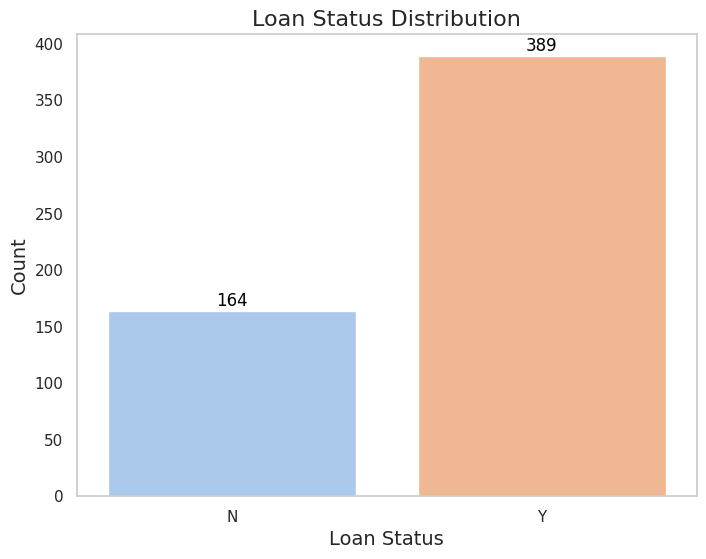

In [ ]:
grouped = df1.groupby('Loan_Status').agg('count')['Loan_ID']
grouped = pd.DataFrame(grouped)

# Create the bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=grouped.index, y="Loan_ID", data=grouped, palette='pastel')

# Add data labels on top of the bars
for idx, value in enumerate(grouped['Loan_ID']):
    bar_plot.text(idx, value + 1, str(value), ha='center', va='bottom', fontsize=12, color='black')

# Remove grid lines
bar_plot.grid(visible=False)

plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Loan Status Distribution', fontsize=16)
plt.xticks(rotation=0)
plt.show()

In [ ]:
df1['Loan_Status'].value_counts(normalize=True)

Y   0.70
N   0.30
Name: Loan_Status, dtype: float64

#**Feature Engineering**

In [ ]:
#convert the string values to boolean value
df1['Gender'] = df1['Gender'].map({'Male':1,'Female':0}).astype('int')
df1['Married'] = df1['Married'].map({'Yes':1,'No':0}).astype('int')
df1['Education'] = df1['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
df1['Self_Employed'] = df1['Self_Employed'].map({'Yes':1,'No':0}).astype('int')
df1['Property_Area'] = df1['Property_Area'].map({'Rural':0,'Semiurban':2,'Urban':1}).astype('int')
df1['Loan_Status'] = df1['Loan_Status'].map({'Y':1,'N':0}).astype('int')

#**X and Y Var**

In [ ]:
xvar = ['Gender',	'Married',	'Dependents',	'Education',	'Self_Employed',
        'ApplicantIncome',	'CoapplicantIncome',	'LoanAmount',	'Loan_Amount_Term',	'Credit_History',	'Property_Area']
yvar = ['Loan_Status']

In [ ]:
x = df1[xvar]
y = df1[yvar]

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            553 non-null    object 
 1   Gender             553 non-null    int64  
 2   Married            553 non-null    int64  
 3   Dependents         553 non-null    int64  
 4   Education          553 non-null    int64  
 5   Self_Employed      553 non-null    int64  
 6   ApplicantIncome    553 non-null    int64  
 7   CoapplicantIncome  553 non-null    float64
 8   LoanAmount         553 non-null    float64
 9   Loan_Amount_Term   553 non-null    float64
 10  Credit_History     553 non-null    float64
 11  Property_Area      553 non-null    int64  
 12  Loan_Status        553 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 60.5+ KB


#**EDA**

##**Correlation**

<ipython-input-31-cdd5905fd14e>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr.corr(), dtype=np.bool))
<ipython-input-31-cdd5905fd14e>:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_corr.corr(), dtype=np.bool))
<ipython-input-31-cdd5905fd14e>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_corr.c

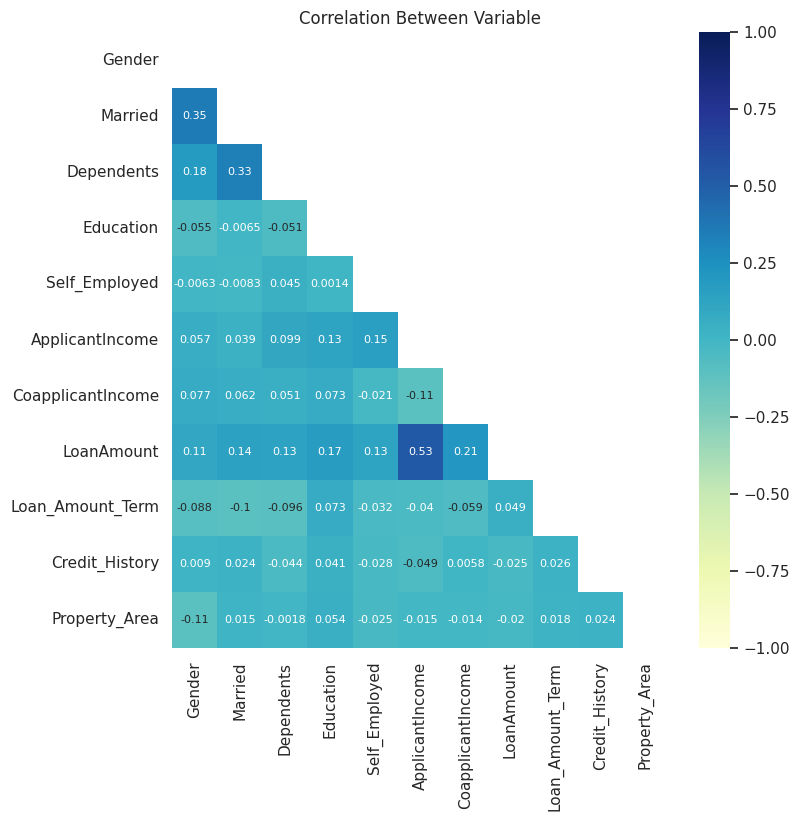

In [ ]:
df_corr = df1.drop(['Loan_Status'], axis=1)


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Variable')

mask = np.triu(np.ones_like(
    df_corr.corr(), dtype=np.bool))
#Munculkan bagian bawah saja

sns.heatmap(df_corr.corr(),vmin=-1,
            vmax=1,cmap='YlGnBu',annot=True,mask=mask,
            annot_kws={"fontsize":8})
plt.grid(False)

plt.show()

**Applicant income and Loan Amount have moderate correlation**

##**Charting Numerical Column**

In [ ]:
numcol=['ApplicantIncome',
        'CoapplicantIncome',
        'LoanAmount',
        'Loan_Amount_Term',
        'Dependents']
catcol=['Gender',	'Married', 'Education',	'Self_Employed', 'Credit_History',	'Property_Area']

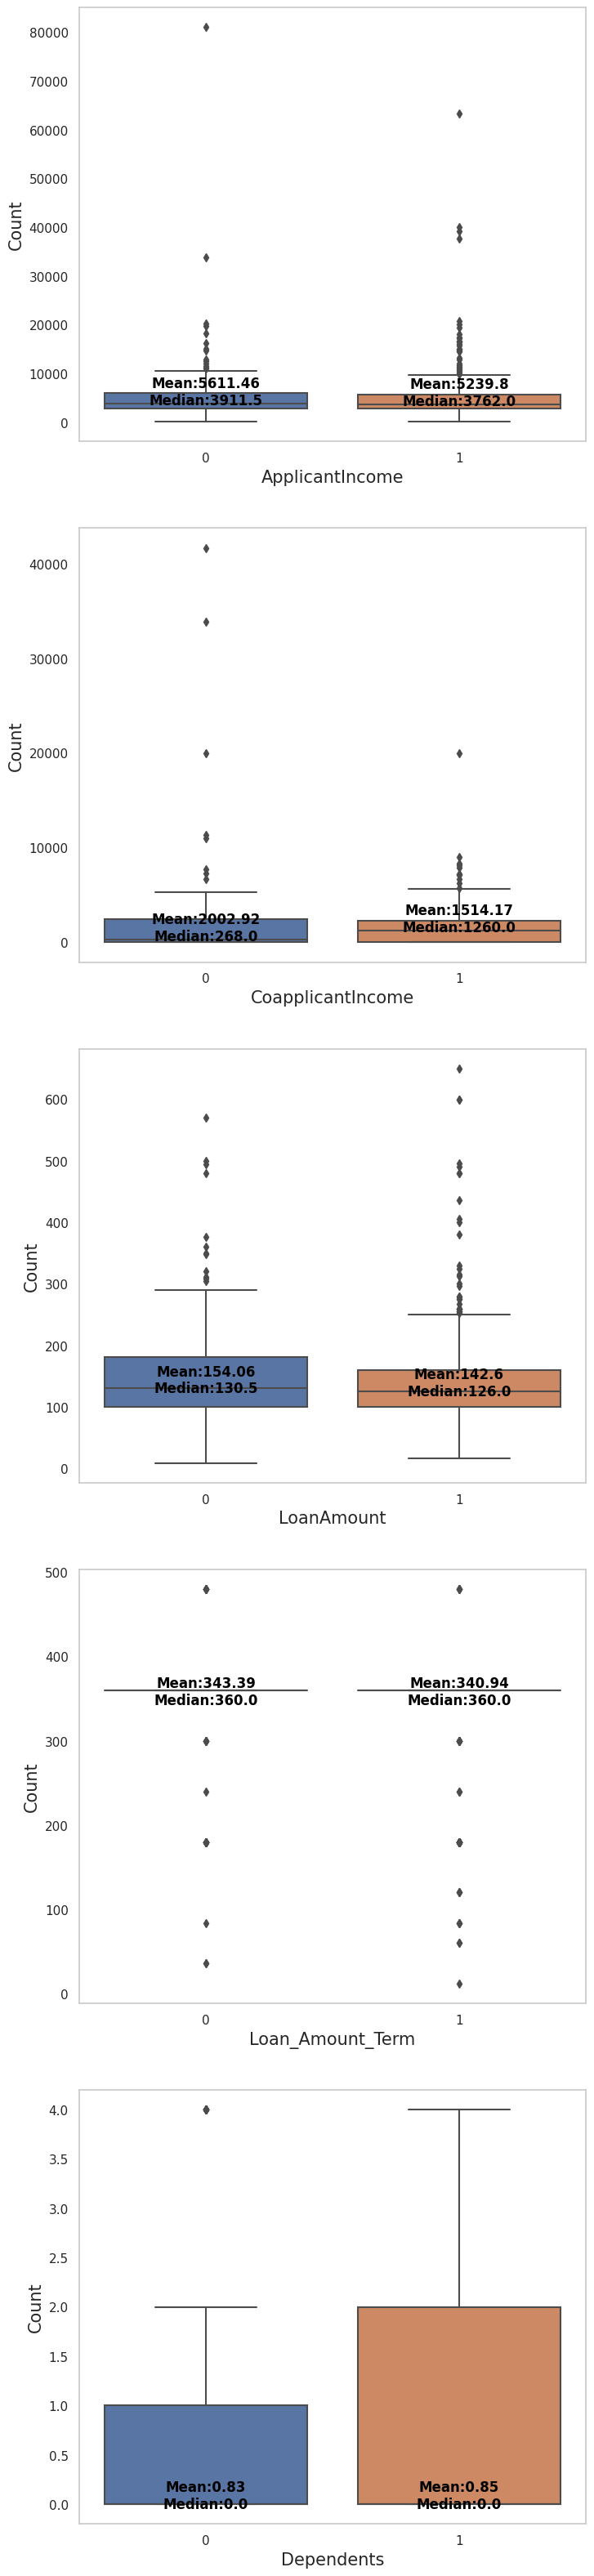

In [ ]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(ncols=1, nrows=len(numcol), figsize=(8, 8 * len(numcol)))
i = 0
for x in numcol:
    g = sns.boxplot(x='Loan_Status', y=x, data=df1, ax=axes[i])
    g.set_xlabel(x, fontsize=15)
    g.set_ylabel("Count", fontsize=15)
    g.grid(visible=False)  # Add this line to remove grid lines
    i += 1
    means = df1.groupby('Loan_Status')[x].mean()
    medians = df1.groupby('Loan_Status')[x].median()
    vertical_offset = df1[x].mean() * .05
    for xtick in g.get_xticks():
        g.text(xtick, medians[xtick] - vertical_offset,
               "Mean:" + str(round(means[xtick], 2)) + '\n' + "Median:" + str(round(medians[xtick], 2)),
               horizontalalignment='center', color='black', weight='semibold')

plt.show(fig)

##**Chart Categorical Column**

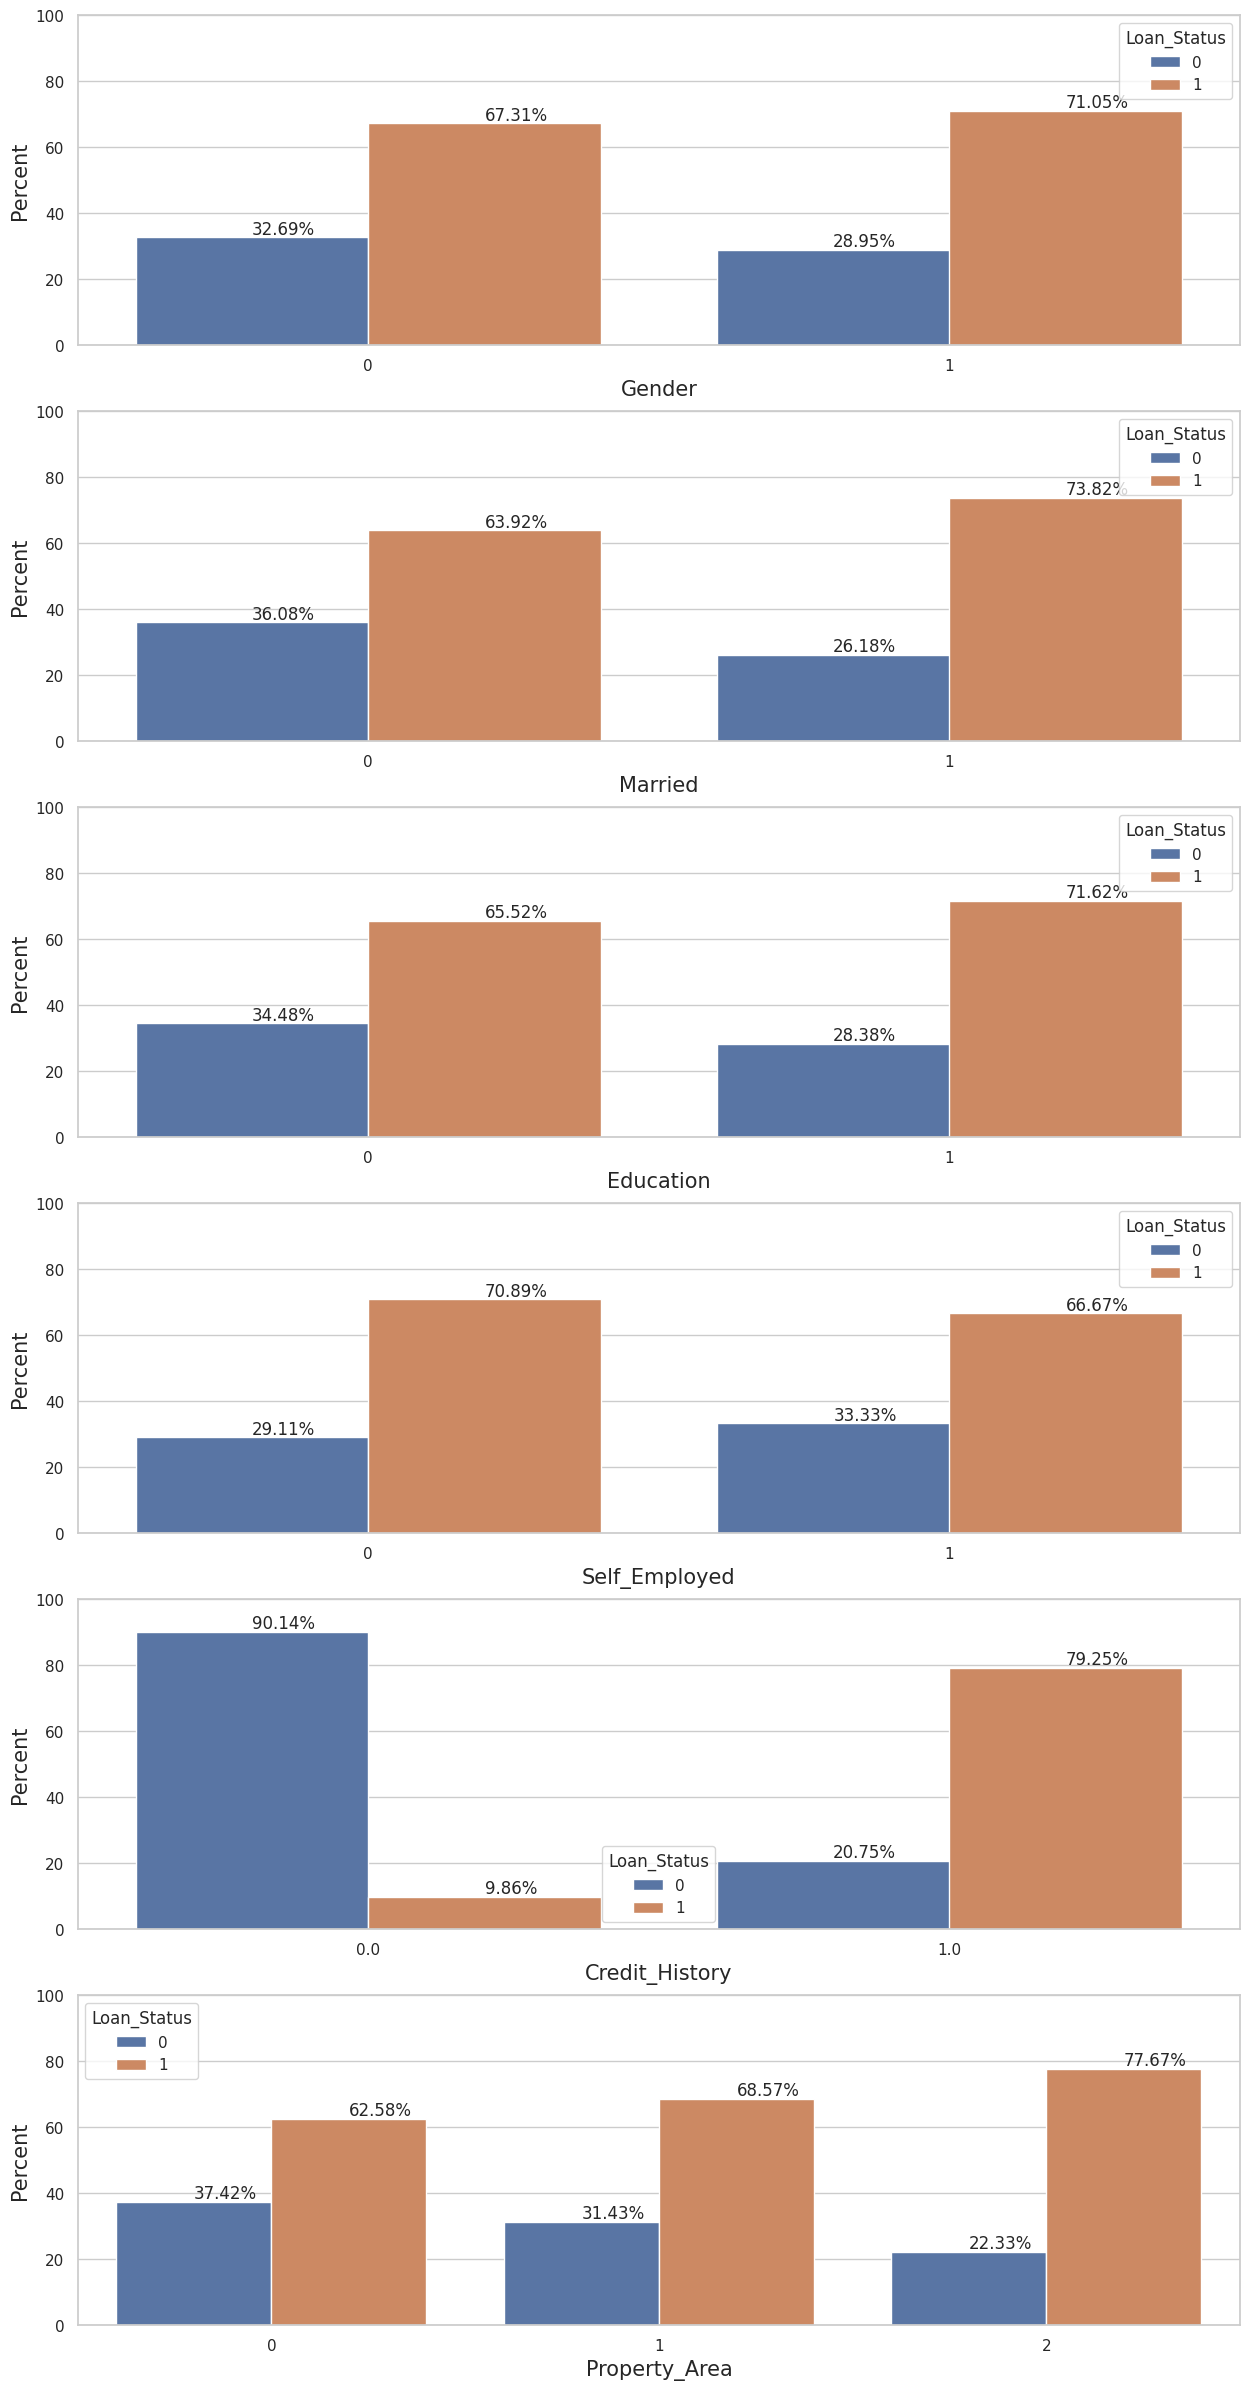

In [ ]:
sns.set(style="whitegrid", color_codes=True)
fig, axes = plt.subplots(ncols=1, nrows = len(catcol), figsize = (15,5*len(catcol)))
i = 0
for x in catcol:
    d = df1.groupby(x)['Loan_Status'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()
    g = sns.barplot(x=x,y='Percentage',hue='Loan_Status', data=d, ax=axes[i])     # Create bar chart
    g.set_ylim(0,100)
    g.set_xlabel(x,fontsize=15)
    g.set_ylabel("Percent",fontsize=15)
    i += 1
    for p in g.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x() + p.get_width()/2
        txt_y = p.get_height()
        g.text(txt_x,txt_y+1,txt)        # Printing percentages on the bars


plt.show(fig)

#**Feature Scalling**

In [ ]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,"1,508.00",128.00,360.00,1.00,0,0
2,LP001005,1,1,0,1,1,3000,0.00,66.00,360.00,1.00,1,1
3,LP001006,1,1,0,0,0,2583,"2,358.00",120.00,360.00,1.00,1,1
4,LP001008,1,0,0,1,0,6000,0.00,141.00,360.00,1.00,1,1
5,LP001011,1,1,2,1,1,5417,"4,196.00",267.00,360.00,1.00,1,1


In [ ]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

In [ ]:
x=df1[xvar]
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,"1,508.00",128.00,360.00,1.00,0
2,1,1,0,1,1,3000,0.00,66.00,360.00,1.00,1
3,1,1,0,0,0,2583,"2,358.00",120.00,360.00,1.00,1
4,1,0,0,1,0,6000,0.00,141.00,360.00,1.00,1
5,1,1,2,1,1,5417,"4,196.00",267.00,360.00,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.00,71.00,360.00,1.00,0
610,1,1,4,1,0,4106,0.00,40.00,180.00,1.00,0
611,1,1,1,1,0,8072,240.00,253.00,360.00,1.00,1
612,1,1,2,1,0,7583,0.00,187.00,360.00,1.00,1


In [ ]:
st = StandardScaler()
x[cols]=st.fit_transform(x[cols])

<ipython-input-38-77db33d1e932>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[cols]=st.fit_transform(x[cols])


#**TrainTest**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2 ,random_state=42)

##**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced', max_iter=500)

model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced', max_iter=500)

In [ ]:
model.score(x_train, y_train)

0.7714932126696833

In [ ]:
model.score(x_test, y_test)

0.6936936936936937

#**Parameter Tuning**

##**Logistic  Regression**

In [ ]:
hpmodel = LogisticRegression(class_weight='balanced', max_iter=350, C=10)

hpmodel.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=10, class_weight='balanced', max_iter=350)

In [ ]:
hpmodel.score(x_train, y_train)

0.7805429864253394

In [ ]:
hpmodel.score(x_test, y_test)

0.7117117117117117

##**Confusion Matrix**




In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

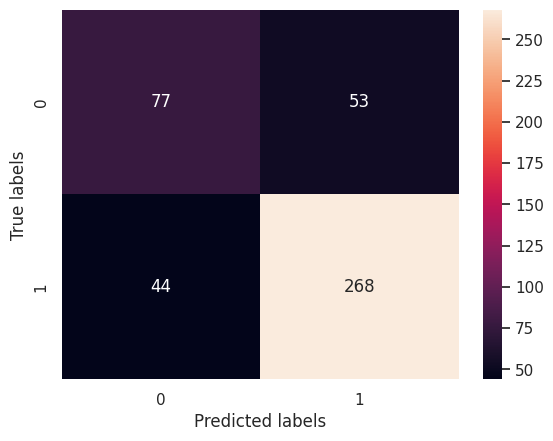

In [ ]:
# 0 : Rejected
# 1 : Approved
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_train, hpmodel.predict(x_train)), annot=True, fmt = 'd')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');

In [ ]:
print(classification_report(y_train, hpmodel.predict(x_train), target_names=['Not Approved','Approved']))

              precision    recall  f1-score   support

Not Approved       0.64      0.59      0.61       130
    Approved       0.83      0.86      0.85       312

    accuracy                           0.78       442
   macro avg       0.74      0.73      0.73       442
weighted avg       0.78      0.78      0.78       442



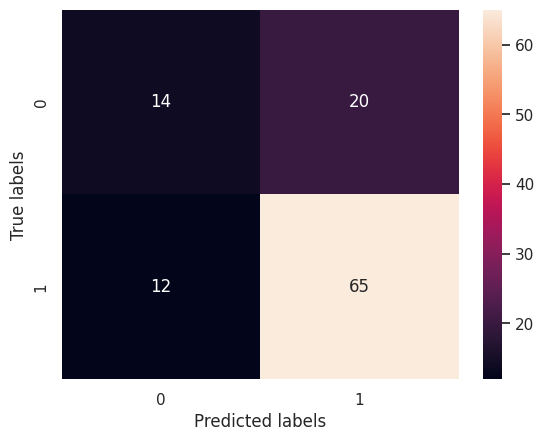

In [ ]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, hpmodel.predict(x_test)), annot=True, fmt = 'd')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');

In [ ]:
print(classification_report(y_test, hpmodel.predict(x_test), target_names=['Not Approved','Approved']))

              precision    recall  f1-score   support

Not Approved       0.54      0.41      0.47        34
    Approved       0.76      0.84      0.80        77

    accuracy                           0.71       111
   macro avg       0.65      0.63      0.63       111
weighted avg       0.70      0.71      0.70       111



##**Define feature importance**

In [ ]:
# Membuat DataFrame untuk menampung feature importance
feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance': hpmodel.coef_[0]})

# Mengurutkan berdasarkan nilai feature importance secara menurun
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Menampilkan tabel feature importance
feature_importance

,Feature,Importance
9,Credit_History,3.55
1,Married,0.90
4,Self_Employed,0.74
10,Property_Area,0.46
6,CoapplicantIncome,0.24
3,Education,0.17
5,ApplicantIncome,0.05
2,Dependents,-0.05
8,Loan_Amount_Term,-0.11
0,Gender,-0.28


let's try removing gender, property area, and Loan Amount

##**Recreating the Model**

##**NewModel**

In [ ]:
xvar1 = ['Married',	'Education','Self_Employed',
        'ApplicantIncome',	'CoapplicantIncome',	'Loan_Amount_Term',	'Credit_History']

In [ ]:
x1 = df1[xvar1]
x1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553 entries, 1 to 613
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            553 non-null    int64  
 1   Education          553 non-null    int64  
 2   Self_Employed      553 non-null    int64  
 3   ApplicantIncome    553 non-null    int64  
 4   CoapplicantIncome  553 non-null    float64
 5   Loan_Amount_Term   553 non-null    float64
 6   Credit_History     553 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 34.6 KB


In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1,y,test_size = 0.2 ,random_state=42)

In [ ]:
model1 = LogisticRegression(class_weight='balanced', C=10, max_iter=500)

model1.fit(x_train1, y_train1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=10, class_weight='balanced', max_iter=500)

In [ ]:
model1.score(x_train1, y_train1)

0.8009049773755657

In [ ]:
model1.score(x_test1, y_test1)

0.7837837837837838

In [ ]:
model1.intercept_

array([-0.1915126])

##**New Confusion Matrix**

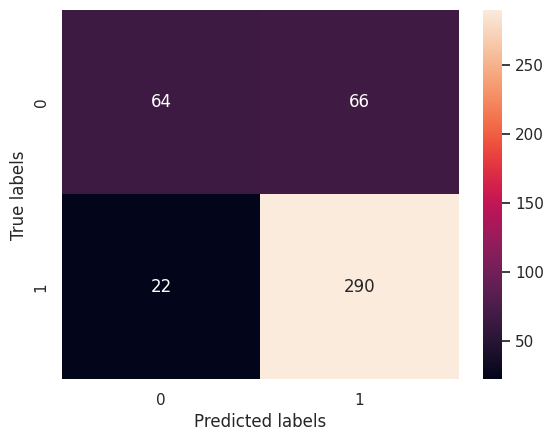

In [ ]:
# 0 : Rejected
# 1 : Approved
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_train1, model1.predict(x_train1)), annot=True, fmt = 'd')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');

In [ ]:
print(classification_report(y_train1, model1.predict(x_train1), target_names=['Not Approved','Approved']))

              precision    recall  f1-score   support

Not Approved       0.74      0.49      0.59       130
    Approved       0.81      0.93      0.87       312

    accuracy                           0.80       442
   macro avg       0.78      0.71      0.73       442
weighted avg       0.79      0.80      0.79       442



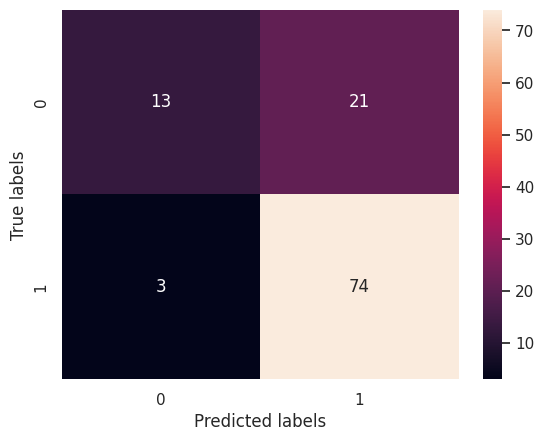

In [ ]:
# 0 : Rejected
# 1 : Approved
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test1, model1.predict(x_test1)), annot=True, fmt = 'd')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');

In [ ]:
print(classification_report(y_test1, model1.predict(x_test1), target_names=['Not Approved','Approved']))

              precision    recall  f1-score   support

Not Approved       0.81      0.38      0.52        34
    Approved       0.78      0.96      0.86        77

    accuracy                           0.78       111
   macro avg       0.80      0.67      0.69       111
weighted avg       0.79      0.78      0.76       111



**New Model Accuracy increased to 78%**

In [ ]:
predicted_prob = model1.predict_proba(x1)
predicted_prob

array([[0.34880093, 0.65119907],
       [0.27338816, 0.72661184],
       [0.37590184, 0.62409816],
       ...,
       [0.37545666, 0.62454334],
       [0.37188646, 0.62811354],
       [0.92226369, 0.07773631]])

In [ ]:
predicted_prob = model1.predict_proba(x1)
predicted_prob
predicted_prob = pd.DataFrame(predicted_prob[:,1], columns = ['predicted_score'])
predicted_prob

,predicted_score
0,0.65
1,0.73
2,0.62
3,0.53
4,0.71
...,...
548,0.56
549,0.88
550,0.62
551,0.63


In [ ]:
y=y.reset_index()
y = y.drop('index', axis=1)
y

,Loan_Status
0,0
1,1
2,1
3,1
4,1
...,...
548,1
549,1
550,1
551,1


In [ ]:
df2=df1.reset_index()
df2=df2.drop('index', axis=1)
df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1,1,0,4583,"1,508.00",128.00,360.00,1.00,0,0
1,LP001005,1,1,0,1,1,3000,0.00,66.00,360.00,1.00,1,1
2,LP001006,1,1,0,0,0,2583,"2,358.00",120.00,360.00,1.00,1,1
3,LP001008,1,0,0,1,0,6000,0.00,141.00,360.00,1.00,1,1
4,LP001011,1,1,2,1,1,5417,"4,196.00",267.00,360.00,1.00,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,LP002978,0,0,0,1,0,2900,0.00,71.00,360.00,1.00,0,1
549,LP002979,1,1,4,1,0,4106,0.00,40.00,180.00,1.00,0,1
550,LP002983,1,1,1,1,0,8072,240.00,253.00,360.00,1.00,1,1
551,LP002984,1,1,2,1,0,7583,0.00,187.00,360.00,1.00,1,1


In [ ]:
x2=x1.reset_index()
x2=x2.drop('index',axis=1)
x2['Loan_ID']=df2['Loan_ID']
x2['approval_score']=predicted_prob['predicted_score']
x2['approval_status']=y['Loan_Status']
x2=x2[['Loan_ID','Married','Education','Self_Employed',	'ApplicantIncome',	'CoapplicantIncome',	'Loan_Amount_Term',	'Credit_History','approval_score','approval_status']]
x2

,Loan_ID,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,approval_score,approval_status
0,LP001003,1,1,0,4583,"1,508.00",360.00,1.00,0.65,0
1,LP001005,1,1,1,3000,0.00,360.00,1.00,0.73,1
2,LP001006,1,0,0,2583,"2,358.00",360.00,1.00,0.62,1
3,LP001008,0,1,0,6000,0.00,360.00,1.00,0.53,1
4,LP001011,1,1,1,5417,"4,196.00",360.00,1.00,0.71,1
...,...,...,...,...,...,...,...,...,...,...
548,LP002978,0,1,0,2900,0.00,360.00,1.00,0.56,1
549,LP002979,1,1,0,4106,0.00,180.00,1.00,0.88,1
550,LP002983,1,1,0,8072,240.00,360.00,1.00,0.62,1
551,LP002984,1,1,0,7583,0.00,360.00,1.00,0.63,1


#**New DataFrame with reduced feature**

In [ ]:
df_approval=x2.copy()
df_approval.head()

,Loan_ID,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,approval_score,approval_status
0,LP001003,1,1,0,4583,"1,508.00",360.00,1.00,0.65,0
1,LP001005,1,1,1,3000,0.00,360.00,1.00,0.73,1
2,LP001006,1,0,0,2583,"2,358.00",360.00,1.00,0.62,1
3,LP001008,0,1,0,6000,0.00,360.00,1.00,0.53,1
4,LP001011,1,1,1,5417,"4,196.00",360.00,1.00,0.71,1


In [ ]:
def result_concl(df_approval):

    if (df_approval['approval_score'] >= 0.65):
        return '1'
    else:
        return '0'

df_approval['Flag'] = df_approval.apply(result_concl, axis = 1)


In [ ]:
df_approval = df_approval.drop('approval_status',axis=1)
df_approval

,Loan_ID,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,approval_score,Flag
0,LP001003,1,1,0,4583,"1,508.00",360.00,1.00,0.65,1
1,LP001005,1,1,1,3000,0.00,360.00,1.00,0.73,1
2,LP001006,1,0,0,2583,"2,358.00",360.00,1.00,0.62,0
3,LP001008,0,1,0,6000,0.00,360.00,1.00,0.53,0
4,LP001011,1,1,1,5417,"4,196.00",360.00,1.00,0.71,1
...,...,...,...,...,...,...,...,...,...,...
548,LP002978,0,1,0,2900,0.00,360.00,1.00,0.56,0
549,LP002979,1,1,0,4106,0.00,180.00,1.00,0.88,1
550,LP002983,1,1,0,8072,240.00,360.00,1.00,0.62,0
551,LP002984,1,1,0,7583,0.00,360.00,1.00,0.63,0


In [ ]:
df_approval['Flag'].value_counts()

0    351
1    202
Name: Flag, dtype: int64

In [ ]:
(351/553)*100

63.47197106690777

In [ ]:
# Get 50% threshold
pct50_threshold = df_approval['approval_score'].quantile(0.5)

# Get top 50% customers
pct50_customer = df_approval[df_approval['approval_score'] > pct50_threshold]
pct50_customer

,Loan_ID,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,approval_score,Flag
0,LP001003,1,1,0,4583,"1,508.00",360.00,1.00,0.65,1
1,LP001005,1,1,1,3000,0.00,360.00,1.00,0.73,1
2,LP001006,1,0,0,2583,"2,358.00",360.00,1.00,0.62,0
4,LP001011,1,1,1,5417,"4,196.00",360.00,1.00,0.71,1
5,LP001013,1,0,0,2333,"1,516.00",360.00,1.00,0.63,0
...,...,...,...,...,...,...,...,...,...,...
545,LP002961,1,1,0,3400,"2,500.00",360.00,1.00,0.66,1
547,LP002974,1,1,0,3232,"1,950.00",360.00,1.00,0.66,1
549,LP002979,1,1,0,4106,0.00,180.00,1.00,0.88,1
550,LP002983,1,1,0,8072,240.00,360.00,1.00,0.62,0


In [ ]:
pct50_customer['Flag'].value_counts()

1    202
0     74
Name: Flag, dtype: int64

#**Customer Analysis New Dataset**

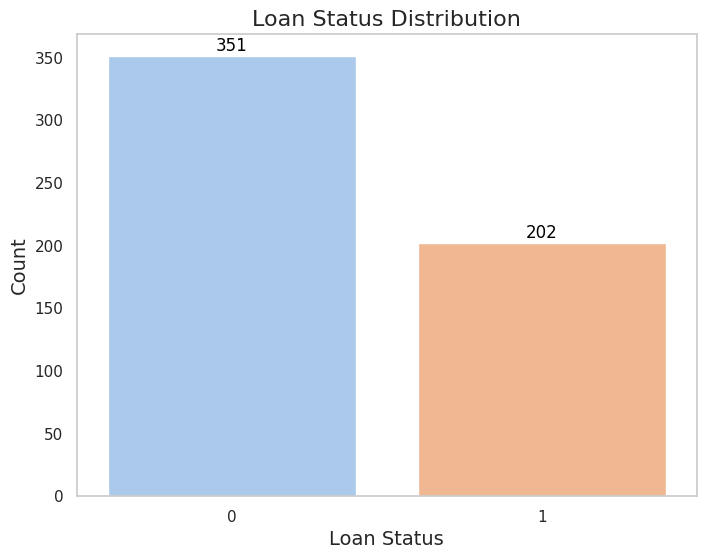

In [ ]:
grouped1 = df_approval.groupby('Flag').agg('count')['Loan_ID']
grouped1 = pd.DataFrame(grouped1)

# Create the bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=grouped1.index, y="Loan_ID", data=grouped1, palette='pastel')

# Add data labels on top of the bars
for idx, value in enumerate(grouped1['Loan_ID']):
    bar_plot.text(idx, value + 1, str(value), ha='center', va='bottom', fontsize=12, color='black')

# Remove grid lines
bar_plot.grid(visible=False)

plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Loan Status Distribution', fontsize=16)
plt.xticks(rotation=0)
plt.show()

# Benefit-Cost Analysis

Assuming there is a customer whose loan application is approved for a total
 loan amount of $1000,

* Loan Interest: interest rate is 10% per year.

* Loan Duration: loan duration is 2 years.

* Operational Costs: operational costs per customer are $10.

* Interest Earned: The interest earned from the customer during the loan duration is  1000 * 0.1 * 2 =  2000.

**Net Profit**: The net profit from one customer is the difference between the interest earned and the operational costs, which is

In [ ]:
((41.67*24)+(8.33*24))*202-((1000*202)+(276*10))

37640.0

**So the expected Net Profit is $37640**

#**Graph after reducing the feature**

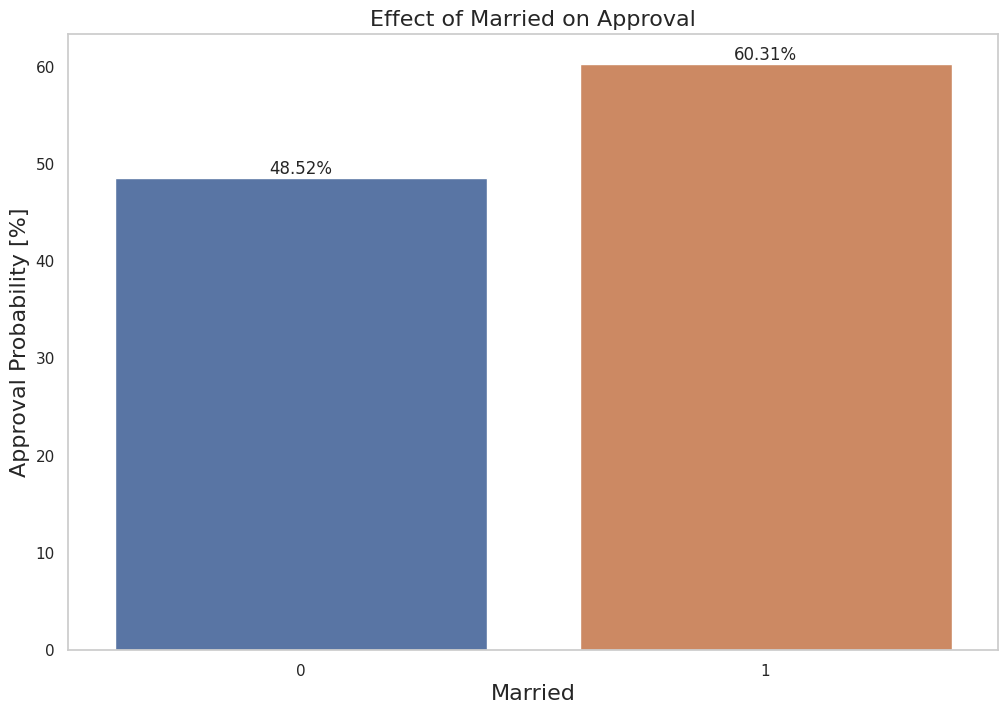

In [ ]:
# group data for deposit_type:
marital_status = df_approval.groupby('Married')["approval_score"].describe()
marital_status


#show figure:
plt.figure(figsize=(12, 8))
sns.barplot(x=marital_status.index, y=marital_status["mean"]*100)
plt.title("Effect of Married on Approval", fontsize=16)
plt.xlabel("Married", fontsize=16)
plt.ylabel("Approval Probability [%]", fontsize=16)
plt.grid(False)

for i, mean_value in enumerate(marital_status["mean"]*100):
    plt.text(i, mean_value, f"{mean_value:.2f}%", ha='center', va='bottom')


plt.show()


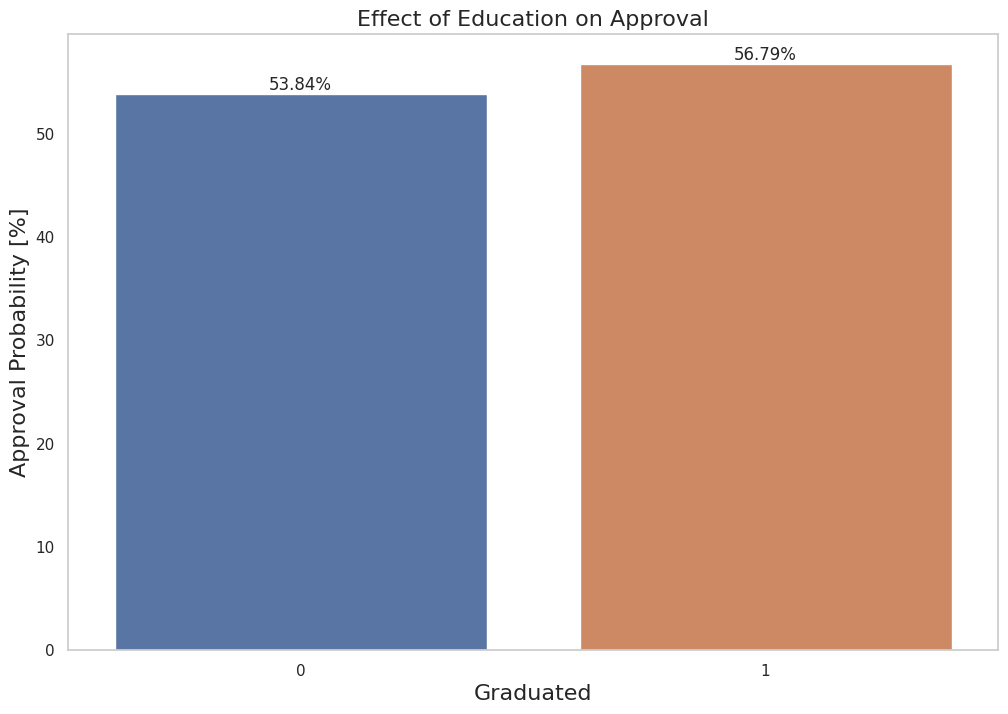

In [ ]:
# group data for deposit_type:
education_status = df_approval.groupby('Education')["approval_score"].describe()
education_status

#show figure:
plt.figure(figsize=(12, 8))
sns.barplot(x=education_status.index, y=education_status["mean"]*100)
plt.title("Effect of Education on Approval", fontsize=16)
plt.xlabel("Graduated", fontsize=16)
plt.ylabel("Approval Probability [%]", fontsize=16)

for i, mean_value in enumerate(education_status["mean"]*100):
    plt.text(i, mean_value, f"{mean_value:.2f}%", ha='center', va='bottom')

plt.grid(False)
plt.show()

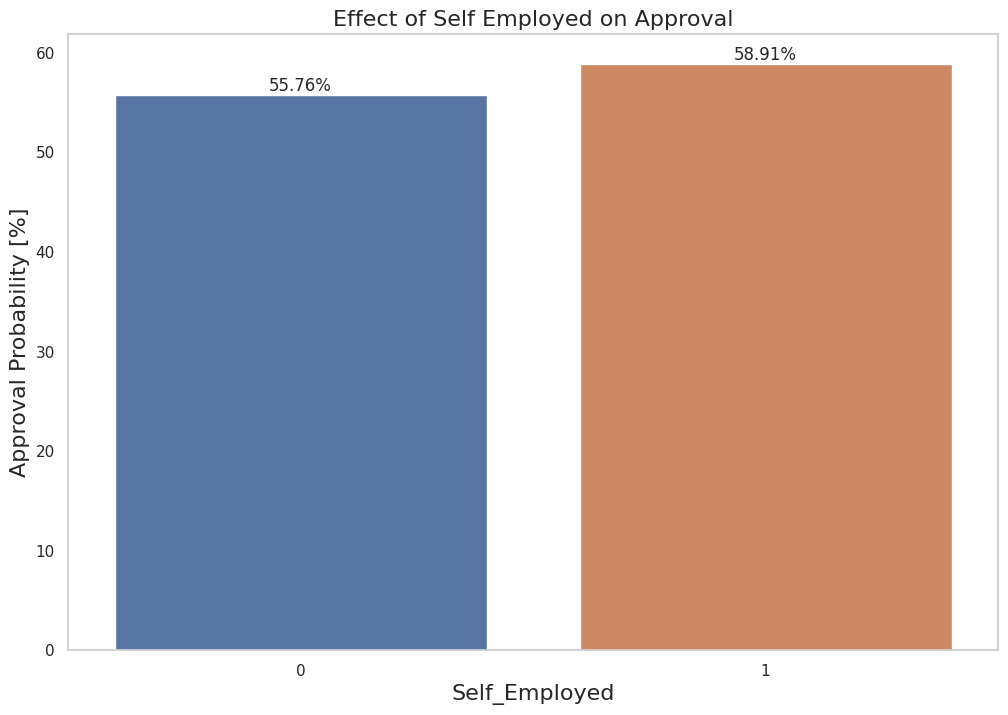

In [ ]:
# group data for deposit_type:
self_employed = df_approval.groupby('Self_Employed')["approval_score"].describe()
self_employed

#show figure:
plt.figure(figsize=(12, 8))
sns.barplot(x=self_employed.index, y=self_employed["mean"]*100)
plt.title("Effect of Self Employed on Approval", fontsize=16)
plt.xlabel("Self_Employed", fontsize=16)
plt.ylabel("Approval Probability [%]", fontsize=16)

for i, mean_value in enumerate(self_employed["mean"]*100):
    plt.text(i, mean_value, f"{mean_value:.2f}%", ha='center', va='bottom')

plt.grid(False)
plt.show()

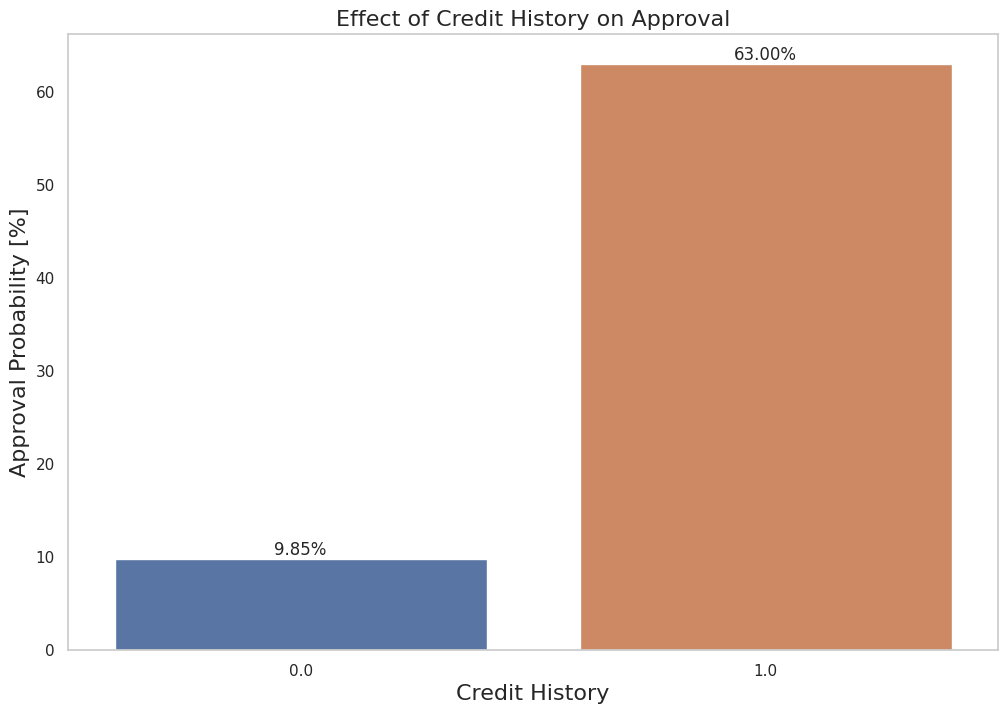

In [ ]:
# group data for deposit_type:
credit_status = df_approval.groupby('Credit_History')["approval_score"].describe()
credit_status

#show figure:
plt.figure(figsize=(12, 8))
sns.barplot(x=credit_status.index, y=credit_status["mean"]*100)
plt.title("Effect of Credit History on Approval", fontsize=16)
plt.xlabel("Credit History", fontsize=16)
plt.ylabel("Approval Probability [%]", fontsize=16)

for i, mean_value in enumerate(credit_status["mean"]*100):
    plt.text(i, mean_value, f"{mean_value:.2f}%", ha='center', va='bottom')

plt.grid(False)
plt.show()

In [ ]:
# group data for deposit_type:
credit_status = df_approval.groupby('Credit_History')["approval_score"].describe()
credit_status

#show figure:
plt.figure(figsize=(12, 8))
sns.barplot(x=credit_status.index, y=credit_status["mean"]*100)
plt.title("Effect of Property on Approval", fontsize=16)
plt.xlabel("Property Area", fontsize=16)
plt.ylabel("Approval Probability [%]", fontsize=16)

for i, mean_value in enumerate(credit_status["mean"]*100):
    plt.text(i, mean_value, f"{mean_value:.2f}%", ha='center', va='bottom')

plt.grid(False)
plt.show()

In [ ]:
numcol1 = ['ApplicantIncome',	'CoapplicantIncome',	'Loan_Amount_Term']

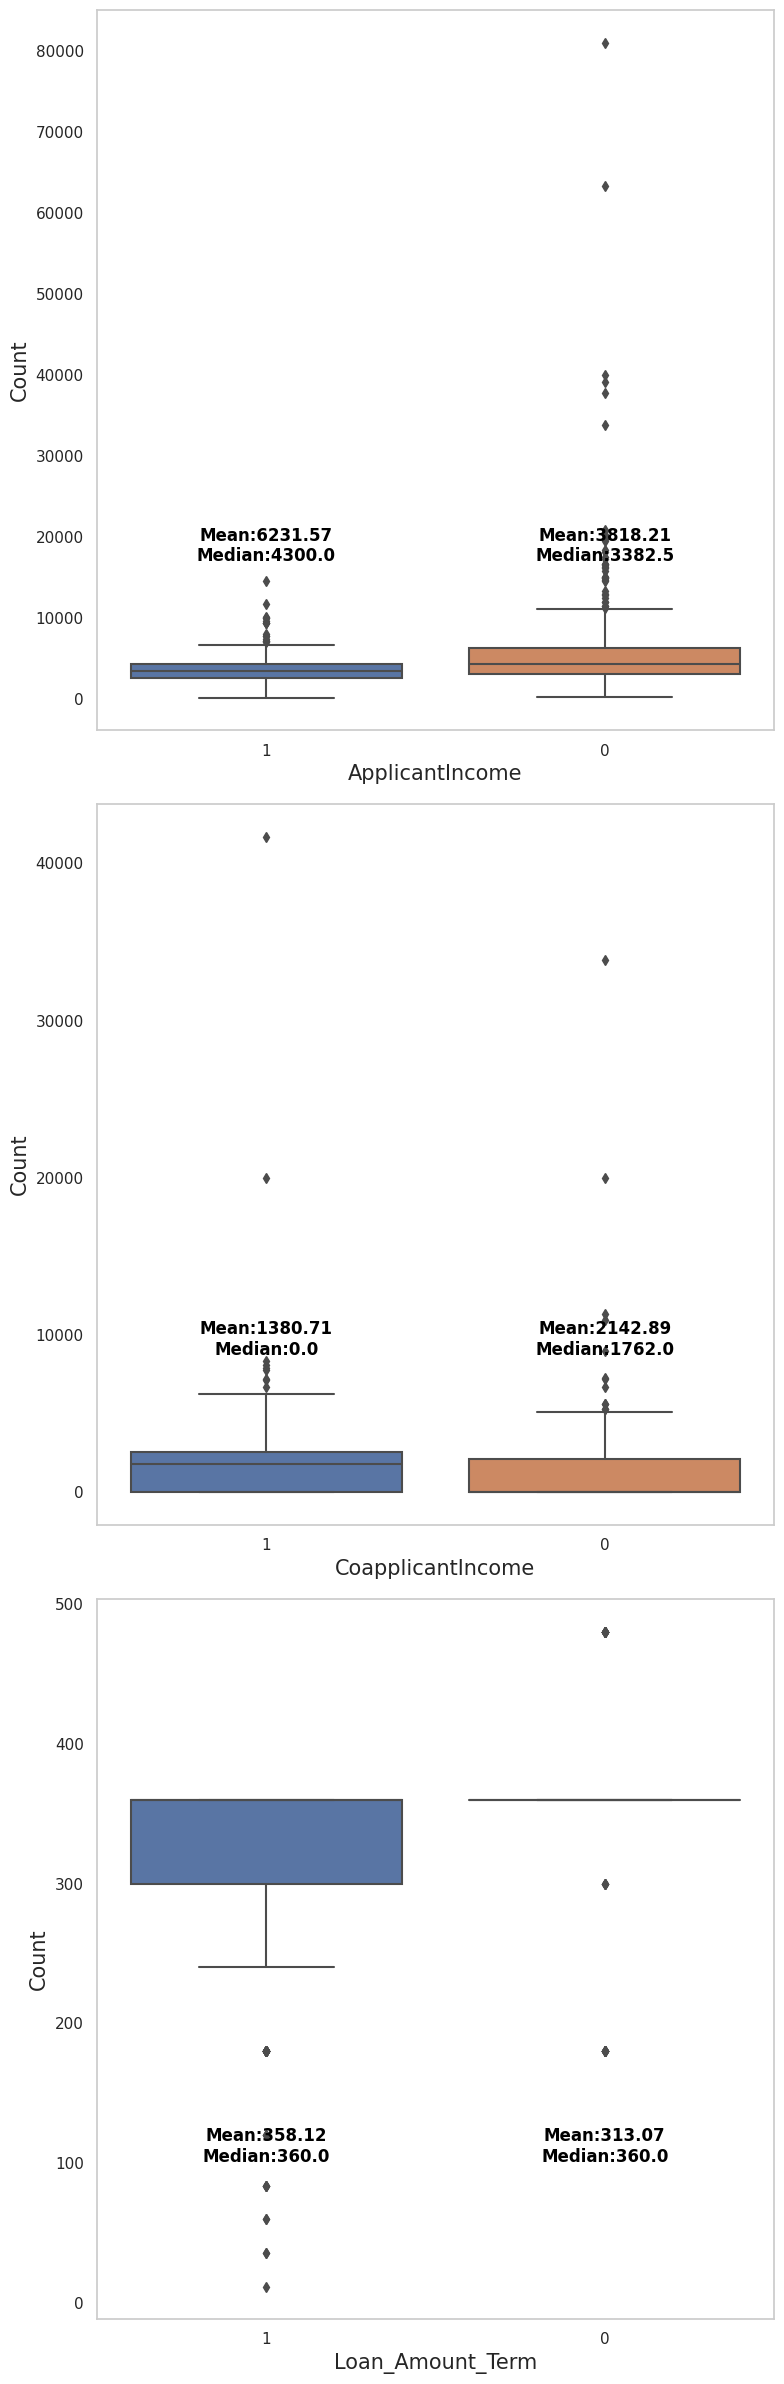

In [ ]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(ncols=1, nrows=len(numcol1), figsize=(8, 8 * len(numcol1)))
i = 0
for x in numcol1:
    g = sns.boxplot(x='Flag', y=x, data=df_approval, ax=axes[i])
    g.set_xlabel(x, fontsize=15)
    g.set_ylabel("Count", fontsize=15)
    g.grid(visible=False)
    i += 1
    means = df_approval.groupby('Flag')[x].mean()
    medians = df_approval.groupby('Flag')[x].median()
    vertical_offset = df_approval[x].mean() * 0.1
    for xtick in g.get_xticks():
        g.text(xtick, g.get_ylim()[1] * 0.25,
               "Mean:" + str(round(means[xtick], 2)) + '\n' + "Median:" + str(round(medians[xtick], 2)),
               horizontalalignment='center', verticalalignment='top',
               color='black', weight='semibold')

plt.tight_layout()
plt.show(fig)